In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

Determine if the survival rate is associated to the class of passenger
Determine if the survival rate is associated to the gender
Determine the survival rate is associated to the age

In [4]:
# read csv file
df = pd.read_csv("titanic.csv")

In [5]:
# read top 5 rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
# print variable names
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [16]:
# get to know about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Class

In [18]:
# Count value of each class
df["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

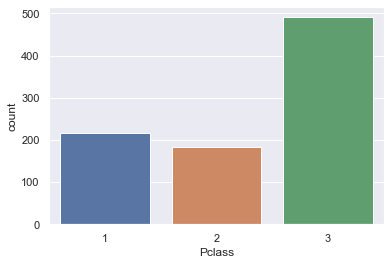

In [17]:
# bar chart of each class count
sns.set(style="darkgrid")
ax = sns.countplot(x="Pclass", data=df)

In [14]:
# Survival rate of each class
table = pd.pivot_table(df,index=["Pclass"],values=["Survived"],aggfunc="mean")
table

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [27]:
# no. of survived of each class
df[(df["Survived"] == 1)].pivot_table(index="Pclass", values="Survived", aggfunc='count')

,Survived
Pclass,
1,136
2,87
3,119


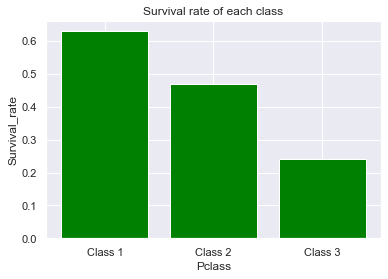

In [30]:
# Survival rate of each class - bar chart
Pclass = ["Class 1", "Class 2", "Class 3"]
Survival_rate = [0.63, 0.47, 0.24]
plt.bar(Pclass, Survival_rate, color = "green")
plt.title("Survival rate of each class")
plt.xlabel("Pclass")
plt.ylabel("Survival_rate")
plt.show()

In [16]:
# table = pd.pivot_table(df,index=["Sex","Pclass"],values=["Survived"],aggfunc="count")
# table

# Gender

In [31]:
# count no. of passenger of each sex
df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [32]:
# count no. of survivor of each sex
df[(df["Survived"] == 1)].pivot_table(index="Sex", values="Survived", aggfunc='count')

,Survived
Sex,
female,233
male,109


In [33]:
# survival rate of each sex
table = pd.pivot_table(df,index=["Sex"],values=["Survived"],aggfunc="mean")
table

,Survived
Sex,
female,0.742038
male,0.188908


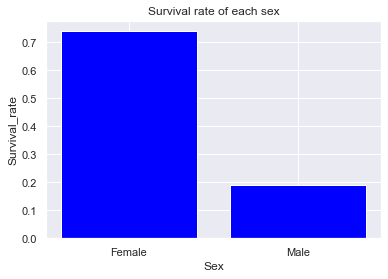

In [34]:
# survival rate of each sex - bar chart
Pclass = ["Female", "Male"]
Survival_rate = [0.74, 0.19]
plt.bar(Pclass, Survival_rate, color = "blue")
plt.title("Survival rate of each sex")
plt.xlabel("Sex")
plt.ylabel("Survival_rate")
plt.show()

# Age

In [15]:
# bin_age = df["Age"].value_counts(bins=5)
# bin_age

In [5]:
# Average age of the survived/ not survived
table = pd.pivot_table(df,index=["Survived"],values=["Age"],aggfunc="mean")
table

,Age
Survived,
0,30.626179
1,28.343690


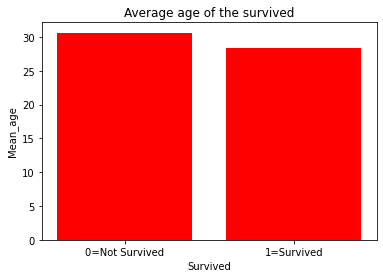

In [12]:
# Average age of the survived/ not survived - barchart
Survived = ["0=Not Survived", "1=Survived"]
Mean_age = [30.63, 28.34]
plt.bar(Survived, Mean_age, color = "red")
plt.title("Average age of the survived")
plt.xlabel("Survived")
plt.ylabel("Mean_age")
plt.show()

In [8]:
# survival rate in respective to the sex and class
table = pd.pivot_table(df,index=["Sex","Pclass"],values=["Age", "Survived"],aggfunc="mean")
table

Age  Survived
Sex    Pclass                     
female 1       34.611765  0.968085
       2       28.722973  0.921053
       3       21.750000  0.500000
male   1       41.281386  0.368852
       2       30.740707  0.157407
       3       26.507589  0.135447

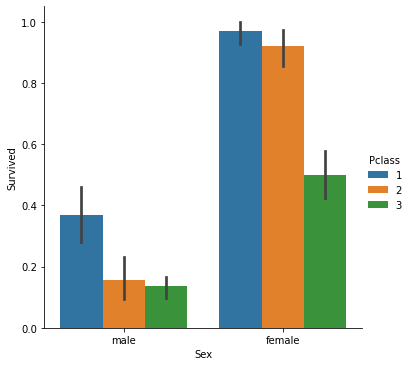

In [14]:
# survival rate in respective to the sex and class - barchart
sns.catplot(x="Sex", y="Survived", hue="Pclass", kind="bar", data=df)